In [85]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Simulate ball throwing and generate Observations

In [ ]:
# simulate motion and observation

class BallThrowingSimulator:
    """
    A simple ball simulator that simulates the motion of a ball under gravity.
    And generates observations based on the ball's position.
    The state is represented as [x, y, vx, vy], where (x, y) is the position and (vx, vy) is the velocity.
    The action is gravity, which affects the y-velocity.
    Observations are generated as noisy measurements of the position. 
    The observation noise is assumed to be Gaussian.
    """
    def __init__(self, delta_t=0.5, init_state=None, ball_num=1, observation_variance=[10, 10]):
        self.delta_t = delta_t
        self.ball_num = ball_num
        self.init_state = init_state if init_state is not None else np.random.rand(
            4, ball_num)*np.array([[50], [50], [200], [200]])

        # Transition model
        # qt = At*qt-1 + Bt*at-1
        self.A = np.array([[1, 0, self.delta_t, 0],
                           [0, 1, 0, self.delta_t],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]], dtype=float)
        self.B = np.array([
            [0, 0, 0],
            [0, 0.5*self.delta_t**2, 0],
            [0, 0, 0],
            [0, self.delta_t, 0]
        ], dtype=float)
        # action is gravity
        g = 10
        self.action = np.array([0, -g, 0]).reshape((3,1))

        # Observation model
        # zt = Ct*qt + vt
        self.C = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0]], dtype=float)
        self.R = np.diag(observation_variance)  # observation noise covariance
    
    def step(self, state):
        """
        Simulate one step of the ball's motion.
        :param state: The current state of the ball [x, y, vx, vy].
        :return: The next state of the ball after applying the transition model.
        """
        return self.A @ state + self.B @ self.action
    def observe(self, state):
        """
        Generate an observation based on the current state of the ball.
        :param state: The current state of the ball [x, y, vx, vy].
        :return: An observation of the ball's position with added Gaussian noise.
        """
        observation = self.C @ state
        noise = np.random.multivariate_normal([0, 0], self.R).reshape(-1, 1)
        return observation + noise
    def simulate(self, time=10):
        """
        Simulate the motion of the ball for a given amount of time.
        :param time: The amount of time to simulate.
        :return: A list of states and observations for each step.
        """
        states = []
        observations = []
        steps = int(time / self.delta_t)
        if steps <= 0:
            raise ValueError("Time must be greater than zero to simulate motion.")
        state = self.init_state.copy()
        states.append(state)
        observations.append(self.observe(state))
        for _ in range(steps):
            state = self.step(state)
            # if state[1]< 0: # touch the ground
            #     break
            states.append(state)
            observations.append(self.observe(state))

        return np.array(states), np.array(observations)

(61, 4, 3) (61, 2, 3)


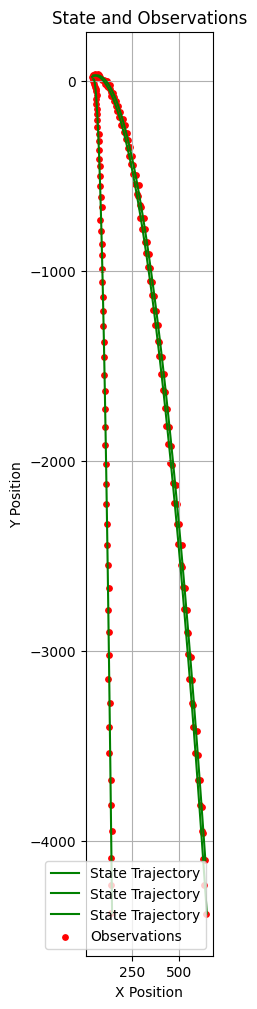

In [96]:
ball_num = 3
# init_state = np.array([[0, 0], [50,30], [100,80], [100,80]])  # Initial state: [x, y, vx, vy]
simulator = BallThrowingSimulator(delta_t=0.5, ball_num=ball_num, observation_variance=[10, 10])
# Simulate the motion and observations
states, observations = simulator.simulate(time=30)
print(states.shape, observations.shape)
# Show the simulated states and observations
fig, ax = plt.subplots(figsize=(12, 12))
ploat_observations(ax, states, observations)

# Initilaize
## State
$$[X, Y, V_x, V_y]^T$$

## Uniform Random Particle Sets
$$X, Y \in [0, 3000]$$
$$V_x, V_y \in [0, 200]$$

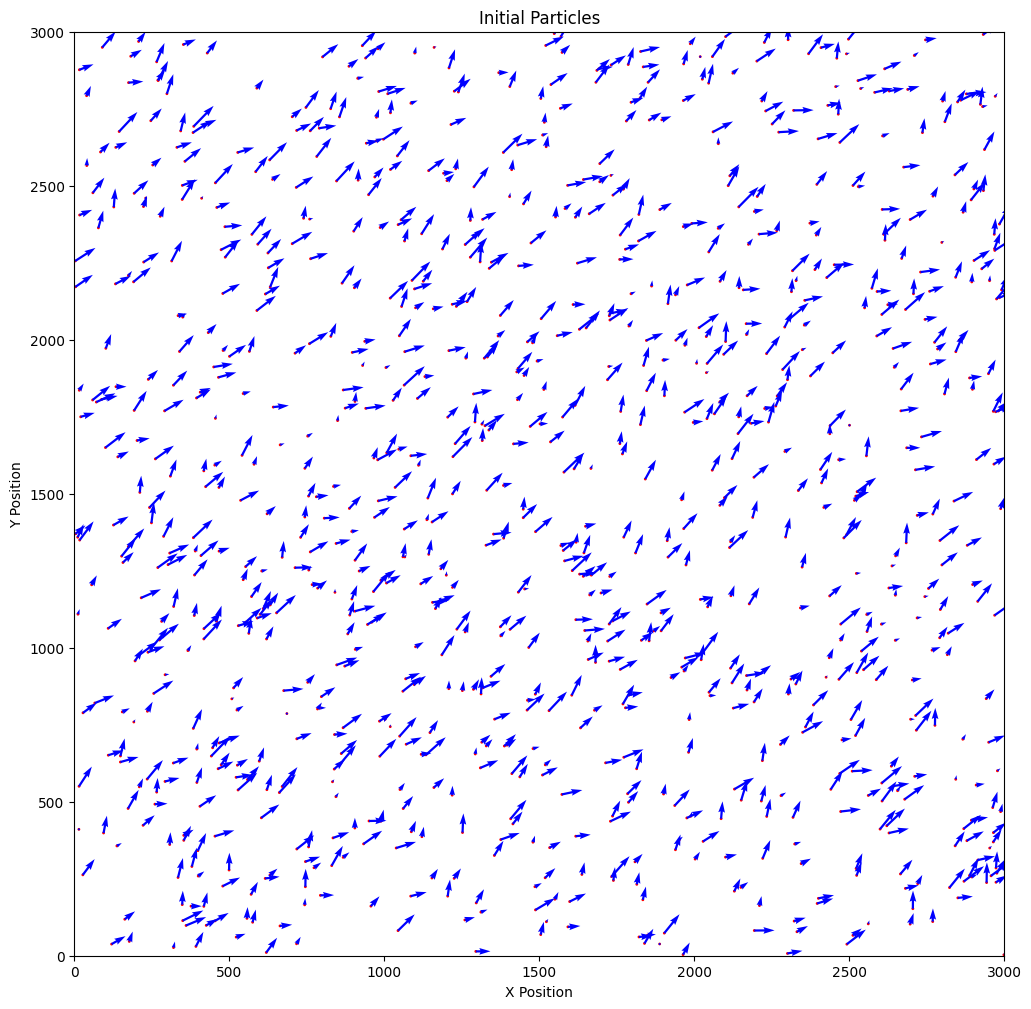

In [88]:
# initialize 1000 random particles
particles = np.random.rand(1000, 4)
particles[:, 0] *= 3000 # x position in [0, 3000]
particles[:, 1] *= 3000 # y position in [0, 3000]
particles[:, 2] *= 200 # velocity in [0, 200]
particles[:, 3] *= 200 # velocity in [0, 200]
weights = np.ones(particles.shape[0]) / particles.shape[0]  # uniform weights


# show initial particles
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(0, 3000)
ax.set_ylim(0, 3000)
ax.set_title('Initial Particles')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
plot_particles(ax, particles, weights)
plt.show()